In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

### Exercise with MYSQL

In this exercise, I used MySQL to filter and combine information I wanted from the County Health Rankings National Data. I sincerely thank Philip Gigliotti for pointing me to the dataset. https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

If you download '2021 County Health Rankings National Data' dataset, you will get a very comprehensive dataset that includes a lot of information on each county in the United States. I am interested in exploring health trends in counties that can contribute to better marketing of health insurance policies that could potentially be useful for health insurance companies. 

Keeping the question in mind, I undertook the following steps to derive a dataset that would help me solve the above problem. I used SQL to do the initial cleaning, filtering, and joining datasets. I am going to use Python to do additional wrangling and exploratory data analysis. 

1. I extracted the 'Ranked Measure Data and 'Additional Measure Data' tab. 
2. I saw that it had a lot of 'blanks', as in missing values. This will be problematic when you import the table into SQL. SQL will convert the columns with the Blanks into 'txt' datatype although your column is numeric. Therefore, I used Excel to replace all the blanks with -99. The dataset also had 'x' in the columns which I took to be no information as well. I also changed that to -99. MYSQL will not import rows that it doesn't like resulting in missing data. Therefore, it is necessary to explore your data well before importing. 
3. I then converted the two excel files into separate csv files. The encoding is important here. Excel saves it with UTF-B BOM encoding, which MySQL did not like. Therefore, I opened the files with VSCODE and changed the encoding to UTF. 
4. I created a schema in MySQL called 'County Health Data' and imported the two tables. I checked the datatype of all the columns to make sure that it is what is should be. 
5. The next step was to replace all the '-99s' with NULL so that we can run Null value operations with the data. I did this for one table, which was pretty time intensive as the datasets had a lot of columns. I am going to do the rest in python. I used this query: 

UPDATE tablename
SET columnname = NULL
WHERE columnname = -99;

6. I then joined the two tables. I used the JOIN command because I wanted columns/rows from both the tables. Here is my query. I selected the columns of interest to me at this stage. 

-- CREATE VIEW county_data
-- AS
-- SELECT ranked.FIPS, ranked.State, ranked.County, Deaths, `% Fair or Poor Health`, `Average Number of Physically Unhealthy Days`, `Average Number of Mentally Unhealthy Days`,
-- `% Low birthweight`, `% Smokers`, `% Adults with Obesity`, `% Physically Inactive`, `% With Access to E-99ercise Opportunities`,
-- `% E-99cessive Drinking`, `% Driving Deaths with Alcohol Involvement`, `Chlamydia Rate`, `Teen Birth Rate`, ranked.`# Uninsured`, ranked.`% Uninsured`,
-- `# Primary Care Physicians`, `# Dentists`, `% With Annual Mammogram`, `% Vaccinated`, `# Completed High School`, `# Some College`, `# Unemployed`,
-- `% Children in Poverty`, `80th Percentile Income`, `20th Percentile Income`, `# Children in Single-Parent Households`,
-- `# Children in Households`, `Violent Crime Rate`, `Injury Death Rate`, `% Severe Housing Problems`, `Life E-99pectancy`, `Age-Adjusted Death Rate`, `Child Mortality Rate`, 
-- `Infant Mortality Rate`, `% Adults with Diabetes`, `HIV Prevalence Rate`, `# Food Insecure`, `# Limited Access`, `# Drug Overdose Deaths`, `# Motor Vehicle Deaths`,
-- `Median Household Income`, `Homicide Rate`, `Firearm Fatalities Rate`, `# Homeowners`, `# Households with Severe Cost Burden`, `% Broadband Access`,
-- additional.`Population`, `% Less Than 18 Years of Age`, `% 65 and Over`, `# Black`, `# American Indian & Alaska Native`, `# Asian`, 
-- `# Native Hawaiian/Other Pacific Islander`, `# Hispanic`, `# Non-Hispanic White`, `# Not Proficient in English`, `% Female`, `# Rural`
-- FROM ranked
-- 	JOIN additional
-- 	ON ranked.FIPS = additional.FIPS

7. I then exported the table to csv. 



In [2]:
county = pd.read_csv('county_data.csv')

In [3]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FIPS                                         3142 non-null   int64  
 1   State                                        3142 non-null   object 
 2   County                                       3142 non-null   object 
 3   Deaths                                       2855 non-null   float64
 4   % Fair or Poor Health                        3142 non-null   int64  
 5   Average Number of Physically Unhealthy Days  3142 non-null   float64
 6   Average Number of Mentally Unhealthy Days    3142 non-null   float64
 7   % Low birthweight                            3037 non-null   float64
 8   % Smokers                                    3142 non-null   int64  
 9   % Adults with Obesity                        3142 non-null   int64  
 10  

In [4]:
county.head()

,FIPS,State,County,Deaths,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low birthweight,% Smokers,% Adults with Obesity,...,% 65 and Over,# Black,# American Indian & Alaska Native,# Asian,# Native Hawaiian/Other Pacific Islander,# Hispanic,# Non-Hispanic White,# Not Proficient in English,% Female,# Rural
0,1001,Alabama,Autauga,787.0,20,4.5,4.9,9.0,20,33,...,16.0,11098,266,656,58,1671,41215,419,51.5,22921
1,1003,Alabama,Baldwin,3147.0,16,3.6,4.8,8.0,19,30,...,21.0,19215,1742,2380,154,10534,185747,1425,51.5,77060
2,1005,Alabama,Barbour,515.0,30,5.6,5.6,11.0,26,41,...,19.7,11807,170,116,52,1117,11235,454,47.1,18613
3,1007,Alabama,Bibb,476.0,24,4.9,5.3,10.0,23,37,...,16.7,4719,103,48,26,623,16663,71,46.7,15663
4,1009,Alabama,Blount,1100.0,22,5.0,5.4,7.0,23,33,...,18.7,872,370,185,67,5582,50176,878,50.8,51562


I know that there are a lot of columns with -99. I want to change them to Null.

In [5]:
county = county.replace(-99, np.nan)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
missing1 = pd.concat([county.isnull().sum(), 100 * county.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing1.sort_values(by=['count', '%'], ascending = True)

,count,%
FIPS,0,0.000000
State,0,0.000000
County,0,0.000000
% Fair or Poor Health,0,0.000000
Average Number of Physically Unhealthy Days,0,0.000000
Average Number of Mentally Unhealthy Days,0,0.000000
% Smokers,0,0.000000
% Adults with Obesity,0,0.000000
% Physically Inactive,0,0.000000
% E-99cessive Drinking,0,0.000000


Since these are all numerical columns, I can impute the missing values with the average. I am going to choose the median which avoids problems with outliers. 

In [8]:
county['# Uninsured'].fillna(county['# Uninsured'].median(), inplace = True)
county['% Uninsured'].fillna(county['% Uninsured'].median(), inplace = True)
county['# Unemployed'].fillna(county['# Unemployed'].median(), inplace = True)
county['% Children in Poverty'].fillna(county['% Children in Poverty'].median(), inplace = True)
county['80th Percentile Income'].fillna(county['80th Percentile Income'].median(), inplace = True)
county['20th Percentile Income'].fillna(county['20th Percentile Income'].median(), inplace = True)
county['# Children in Single-Parent Households'].fillna(county['# Children in Single-Parent Households'].median(), inplace = True)
county['# Children in Households'].fillna(county['# Children in Households'].median(), inplace = True)
county['Median Household Income'].fillna(county['Median Household Income'].median(), inplace = True)
county['# Households with Severe Cost Burden'].fillna(county['# Households with Severe Cost Burden'].median(), inplace = True)
county['% With Access to E-99ercise Opportunities'].fillna(county['% With Access to E-99ercise Opportunities'].median(), inplace = True)
county['# Rural'].fillna(county['# Rural'].median(), inplace = True)
county['% Vaccinated'].fillna(county['% Vaccinated'].median(), inplace = True)
county['# Limited Access'].fillna(county['# Limited Access'].median(), inplace = True)
county['% With Annual Mammogram'].fillna(county['% With Annual Mammogram'].median(), inplace = True)
county['% Driving Deaths with Alcohol Involvement'].fillna(county['% Driving Deaths with Alcohol Involvement'].median(), inplace = True)
county['Age-Adjusted Death Rate'].fillna(county['Age-Adjusted Death Rate'].median(), inplace = True)
county['Life E-99pectancy'].fillna(county['Life E-99pectancy'].median(), inplace = True)
county['# Dentists'].fillna(county['# Dentists'].median(), inplace = True)
county['% Low birthweight'].fillna(county['% Low birthweight'].median(), inplace = True)
county['Injury Death Rate'].fillna(county['Injury Death Rate'].median(), inplace = True)
county['# Primary Care Physicians'].fillna(county['# Primary Care Physicians'].median(), inplace = True)
county['Chlamydia Rate'].fillna(county['Chlamydia Rate'].median(), inplace = True)
county['Violent Crime Rate'].fillna(county['Violent Crime Rate'].median(), inplace = True)
county['Deaths'].fillna(county['Deaths'].median(), inplace = True)
county['# Motor Vehicle Deaths'].fillna(county['# Motor Vehicle Deaths'].median(), inplace = True)
county['HIV Prevalence Rate'].fillna(county['HIV Prevalence Rate'].median(), inplace = True)
county['Firearm Fatalities Rate'].fillna(county['Firearm Fatalities Rate'].median(), inplace = True)
county['Child Mortality Rate'].fillna(county['Child Mortality Rate'].median(), inplace = True)
county['# Drug Overdose Deaths'].fillna(county['# Drug Overdose Deaths'].median(), inplace = True)
county['Homicide Rate'].fillna(county['Homicide Rate'].median(), inplace = True)
county['Infant Mortality Rate'].fillna(county['Infant Mortality Rate'].median(), inplace = True)
county['Teen Birth Rate'].fillna(county['Teen Birth Rate'].median(), inplace = True)




In [9]:
county['Teen Birth Rate'].fillna(county['Teen Birth Rate'].median(), inplace = True)

In [10]:
missing1 = pd.concat([county.isnull().sum(), 100 * county.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing1.sort_values(by=['count', '%'], ascending = True)

,count,%
FIPS,0,0.0
State,0,0.0
County,0,0.0
Deaths,0,0.0
% Fair or Poor Health,0,0.0
Average Number of Physically Unhealthy Days,0,0.0
Average Number of Mentally Unhealthy Days,0,0.0
% Low birthweight,0,0.0
% Smokers,0,0.0
% Adults with Obesity,0,0.0


In [11]:
county.rename({'Life E-99pectancy': 'Life Expectancy'}, axis =1, inplace = True)


In [12]:
county.rename({'% E-99cessive Drinking': '% Excessive Drinking'}, axis =1, inplace = True)

In [13]:
county.rename({'% With Access to E-99ercise Opportunities': '% With Access to Exercise Opportunities'}, axis =1, inplace = True)

In [14]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FIPS                                         3142 non-null   int64  
 1   State                                        3142 non-null   object 
 2   County                                       3142 non-null   object 
 3   Deaths                                       3142 non-null   float64
 4   % Fair or Poor Health                        3142 non-null   int64  
 5   Average Number of Physically Unhealthy Days  3142 non-null   float64
 6   Average Number of Mentally Unhealthy Days    3142 non-null   float64
 7   % Low birthweight                            3142 non-null   float64
 8   % Smokers                                    3142 non-null   int64  
 9   % Adults with Obesity                        3142 non-null   int64  
 10  

I want to explore patterns related to the potential reasons around uninsured population. This may provide an understanding regarding what socio economic factors contribute to people being uninsured and thus, health insurance companies can market themselves accordingly to reach those who are uninsured. 

I am going to filter for socio-economic factors that I think contributed to people being uninsured. 

In [15]:
df = county[['FIPS', 'State', 'County', 'Teen Birth Rate', '# Uninsured', '# Primary Care Physicians', '# Dentists', '% Vaccinated', '# Completed High School', '# Some College', '# Unemployed', '% Children in Poverty', 
            '80th Percentile Income', '20th Percentile Income', '% Severe Housing Problems', 'Child Mortality Rate' , 'Infant Mortality Rate', '# Food Insecure',
            'Median Household Income', '# Homeowners', '# Households with Severe Cost Burden', '# Black', '# American Indian & Alaska Native',
            '# Asian', '# Native Hawaiian/Other Pacific Islander', '# Hispanic', '# Non-Hispanic White', '# Not Proficient in English', '% Female', '# Rural', 'Population', '% Uninsured']]




In [16]:
df.head()

,FIPS,State,County,Teen Birth Rate,# Uninsured,# Primary Care Physicians,# Dentists,% Vaccinated,# Completed High School,# Some College,...,# American Indian & Alaska Native,# Asian,# Native Hawaiian/Other Pacific Islander,# Hispanic,# Non-Hispanic White,# Not Proficient in English,% Female,# Rural,Population,% Uninsured
0,1001,Alabama,Autauga,24.0,4693.0,26.0,19.0,42.0,33076,8689,...,266,656,58,1671,41215,419,51.5,22921.0,55869,10.0
1,1003,Alabama,Baldwin,26.0,22660.0,153.0,110.0,46.0,137219,33404,...,1742,2380,154,10534,185747,1425,51.5,77060.0,223234,13.0
2,1005,Alabama,Barbour,37.0,2310.0,8.0,9.0,39.0,13152,2379,...,170,116,52,1117,11235,454,47.1,18613.0,24686,14.0
3,1007,Alabama,Bibb,38.0,1764.0,12.0,5.0,40.0,12782,2483,...,103,48,26,623,16663,71,46.7,15663.0,22394,11.0
4,1009,Alabama,Blount,31.0,6642.0,12.0,11.0,40.0,32028,7862,...,370,185,67,5582,50176,878,50.8,51562.0,57826,14.0


I want to explore the distribution of the '#Uninsured' column.

Text(0.5, 1.0, 'A count of Uninsured')

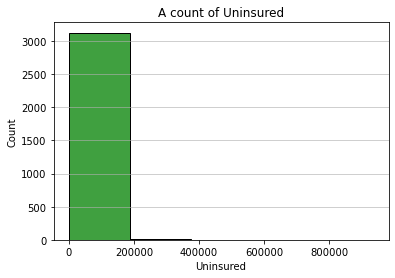

In [17]:
sns.histplot(data = df, x= '# Uninsured', bins = 5, color = 'g') 
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Uninsured') 
plt.ylabel('Count')
plt.title('A count of Uninsured')

In [18]:
df['# Uninsured'].mean()

8897.667727562062

On average, there are 8898 uninsured people across all the counties in the US. Let us see if there are more uninsured in a particular state. 

In [19]:
state = df.groupby('State')['# Uninsured'].sum().sort_values(ascending = False)
print(state)

State
Te-99as                 4883741.0
California              2772644.0
Florida                 2673659.0
Georgia                 1398968.0
North Carolina          1076670.0
New York                1007242.0
Illinois                 853809.0
Arizona                  737852.0
Ohio                     729559.0
Virginia                 705225.0
Pennsylvania             681152.0
Tennessee                662260.0
New Jersey               642184.0
Missouri                 562414.0
Oklahoma                 536856.0
Indiana                  532695.0
Michigan                 526541.0
South Carolina           515001.0
Alabama                  470052.0
Washington               469557.0
Colorado                 419456.0
Louisiana                354948.0
Mississippi              349341.0
Maryland                 346367.0
Nevada                   326024.0
Wisconsin                306773.0
Utah                     288573.0
Oregon                   285855.0
Kentucky                 241947.0
Kansas  

In [20]:
#https://stackoverflow.com/questions/42656585/barplot-colored-according-a-colormap
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 60
x = np.arange(N).astype(float)
y = np.random.uniform(0, 5, size=(N,))


<AxesSubplot:xlabel='State'>

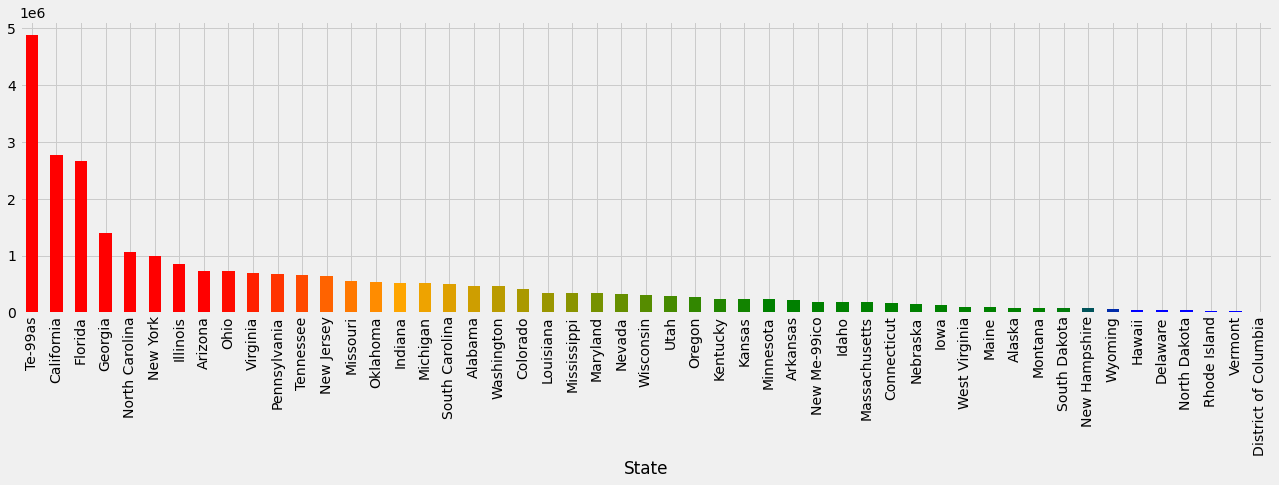

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (20,5))
state.plot.bar(color = rvb(x/N))

Texas, California, Florida, Georgia, North Carolina, and New York have the highest number of uninsured people. While Texas, California, and New York and large populous states, which may have contributed to higher numbers. We will now move on exploring the population of the state. And then the socio economic conditions. 

In [22]:
state1 = df.groupby('State')['Population'].sum().sort_values(ascending = False)
print(state1)

State
California              39512223
Te-99as                 28995881
Florida                 21477737
New York                19453561
Pennsylvania            12801989
Illinois                12671821
Ohio                    11689100
Georgia                 10617423
North Carolina          10488084
Michigan                 9986857
New Jersey               8882190
Virginia                 8535519
Washington               7614893
Arizona                  7278717
Massachusetts            6892503
Tennessee                6829174
Indiana                  6732219
Missouri                 6137428
Maryland                 6045680
Wisconsin                5822434
Colorado                 5758736
Minnesota                5639632
South Carolina           5148714
Alabama                  4903185
Louisiana                4648794
Kentucky                 4467673
Oregon                   4217737
Oklahoma                 3956971
Connecticut              3565287
Utah                     3205958
Iowa

<AxesSubplot:xlabel='State'>

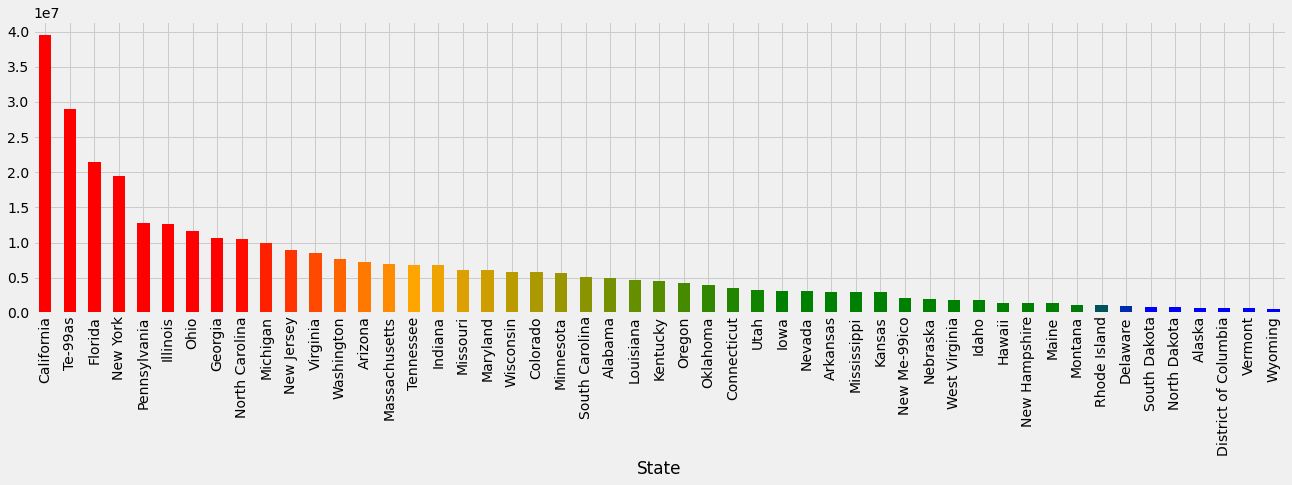

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (20,5))
state1.plot.bar(color = rvb(x/N))

So, population does seem to matter, but it becomes necessary to explore the socio-economic characteristics of the population.

In [24]:
df.groupby('State')['Median Household Income'].mean().sort_values(ascending = False)

State
District of Columbia    90395.000000
New Jersey              85164.428571
Massachusetts           79891.857143
Connecticut             79180.125000
Maryland                79010.708333
Rhode Island            78326.600000
Hawaii                  71124.000000
California              71038.379310
New Hampshire           69527.900000
Alaska                  67604.206897
Delaware                66573.000000
Utah                    66489.689655
Nevada                  64798.176471
Wyoming                 64773.304348
Minnesota               64333.034483
New York                64035.822581
Washington              63085.692308
Colorado                62660.468750
Virginia                62429.887218
North Dakota            61591.339623
Wisconsin               61042.000000
Vermont                 59856.785714
Iowa                    59734.777778
Illinois                58945.078431
Pennsylvania            58873.253731
Indiana                 58545.391304
Oregon                  58335.61

Georgia, Florida, and North Carolina are on the lower end of the Median Household Income spectrum.

Text(0.5, 1.0, 'Relationship between Median Household Income and Uninsured')

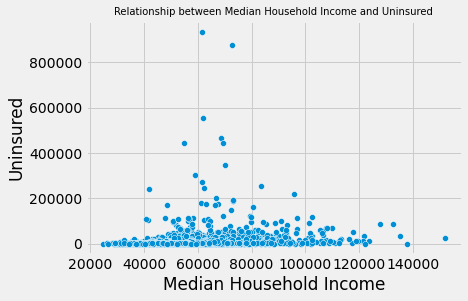

In [25]:
#plt.figure(figsize= (40,20))
sns.scatterplot(x= 'Median Household Income', y= '# Uninsured', data = df)
plt.xlabel('Median Household Income')
plt.ylabel('Uninsured')
plt.title('Relationship between Median Household Income and Uninsured', fontsize = 10)
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)

There seems to be no clear correlation here. A heatmap might be easier to visualize all the relationships.

<AxesSubplot:>

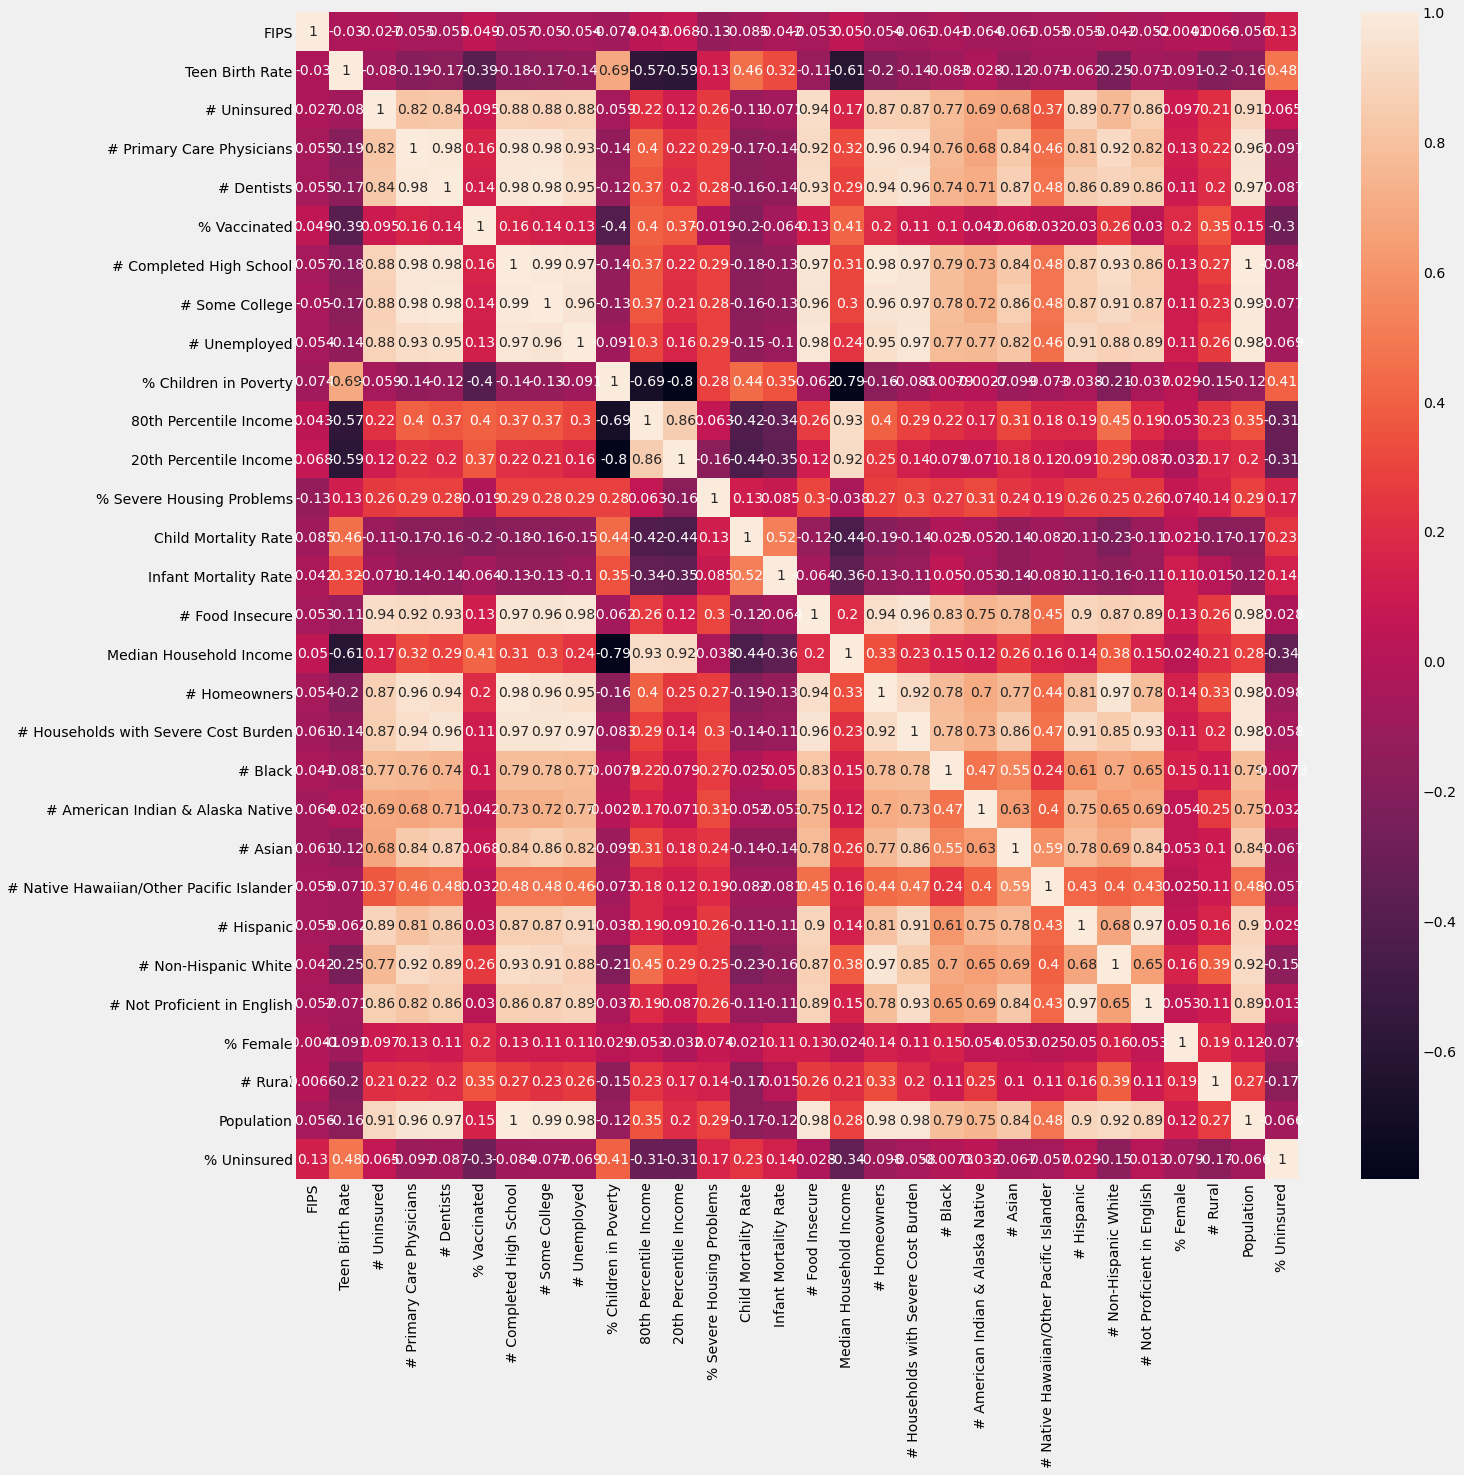

In [26]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot=True)

Three striking relationships need to be explored further. It looks like Number of Uninsured people is highly correlated with food insecurity, number of hispanic population in a county, and number of people not proficient in English. There are other factors such as Number of Primacy Care Physicians, Number of Dentists, Number of People who completed college, but analytically these could be a factor of the population of the county. 

Let us explore the relationship between food insecurity and number of uninsured people. 

Text(0.5, 1.0, 'Relationship between Food Insecurity and Number of Uninsured people in US')

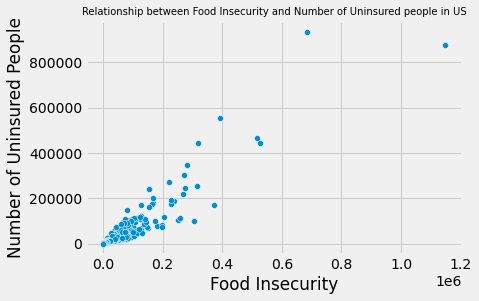

In [27]:
sns.scatterplot(x= '# Food Insecure', y= '# Uninsured', data = df)
plt.xlabel('Food Insecurity')
plt.ylabel('Number of Uninsured People')
plt.title('Relationship between Food Insecurity and Number of Uninsured people in US', fontsize = 10)

We do see that as food insecurity increases, number of uninsured people also increases. This shows that maybe cheaper health insurance schemes may be helpful for areas with higher food insecurity. 

Text(0.5, 1.0, 'Relationship between Hispanic Population and Number of Uninsured people in US')

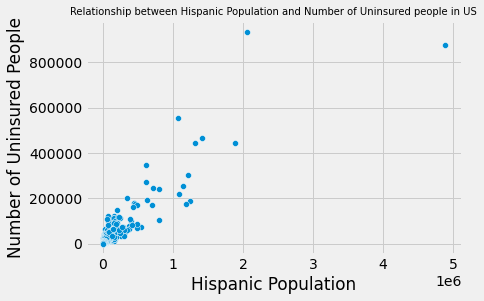

In [28]:
sns.scatterplot(x= '# Hispanic', y= '# Uninsured', data = df)
plt.xlabel('Hispanic Population')
plt.ylabel('Number of Uninsured People')
plt.title('Relationship between Hispanic Population and Number of Uninsured people in US', fontsize = 10)

Text(0.5, 1.0, 'Relationship between Proficiency in English and Number of Uninsured people in US')

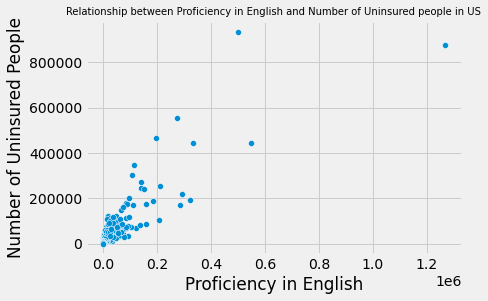

In [29]:
sns.scatterplot(x= '# Not Proficient in English', y= '# Uninsured', data = df)
plt.xlabel('Proficiency in English')
plt.ylabel('Number of Uninsured People')
plt.title('Relationship between Proficiency in English and Number of Uninsured people in US', fontsize = 10)

In [30]:
df['%_Hispanic'] = (df['# Hispanic']/df['Population']) * 100

<ipython-input-30-3098af1749e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_Hispanic'] = (df['# Hispanic']/df['Population']) * 100


In [33]:
df['%_Food Insecure'] = (df['# Food Insecure']/df['Population']) * 100
df['%_Not Prof in English'] = (df['# Not Proficient in English']/df['Population']) * 100

<ipython-input-33-07daf929465d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_Food Insecure'] = (df['# Food Insecure']/df['Population']) * 100
<ipython-input-33-07daf929465d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%_Not Prof in English'] = (df['# Not Proficient in English']/df['Population']) * 100


In [31]:
df.head()

,FIPS,State,County,Teen Birth Rate,# Uninsured,# Primary Care Physicians,# Dentists,% Vaccinated,# Completed High School,# Some College,...,# Asian,# Native Hawaiian/Other Pacific Islander,# Hispanic,# Non-Hispanic White,# Not Proficient in English,% Female,# Rural,Population,% Uninsured,%_Hispanic
0,1001,Alabama,Autauga,24.0,4693.0,26.0,19.0,42.0,33076,8689,...,656,58,1671,41215,419,51.5,22921.0,55869,10.0,2.990925
1,1003,Alabama,Baldwin,26.0,22660.0,153.0,110.0,46.0,137219,33404,...,2380,154,10534,185747,1425,51.5,77060.0,223234,13.0,4.718815
2,1005,Alabama,Barbour,37.0,2310.0,8.0,9.0,39.0,13152,2379,...,116,52,1117,11235,454,47.1,18613.0,24686,14.0,4.524832
3,1007,Alabama,Bibb,38.0,1764.0,12.0,5.0,40.0,12782,2483,...,48,26,623,16663,71,46.7,15663.0,22394,11.0,2.781995
4,1009,Alabama,Blount,31.0,6642.0,12.0,11.0,40.0,32028,7862,...,185,67,5582,50176,878,50.8,51562.0,57826,14.0,9.653097


Text(0.5, 1.0, 'Relationship between Hispanic Population and Number of Uninsured people in US')

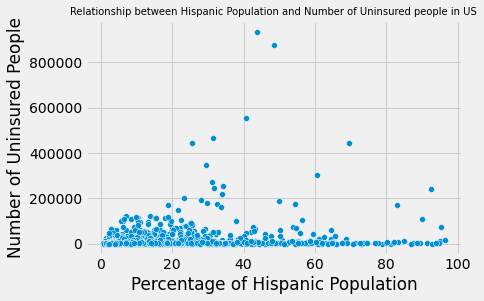

In [32]:
sns.scatterplot(x= '%_Hispanic', y= '# Uninsured', data = df)
plt.xlabel('Percentage of Hispanic Population')
plt.ylabel('Number of Uninsured People')
plt.title('Relationship between Hispanic Population and Number of Uninsured people in US', fontsize = 10)

Text(0.5, 1.0, 'Relationship between Hispanic Population and Number of Uninsured people in US')

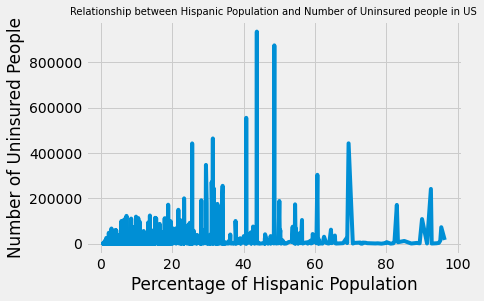

In [41]:
sns.lineplot(x= '%_Hispanic', y= '# Uninsured', data = df)
plt.xlabel('Percentage of Hispanic Population')
plt.ylabel('Number of Uninsured People')
plt.title('Relationship between Hispanic Population and Number of Uninsured people in US', fontsize = 10)

<AxesSubplot:>

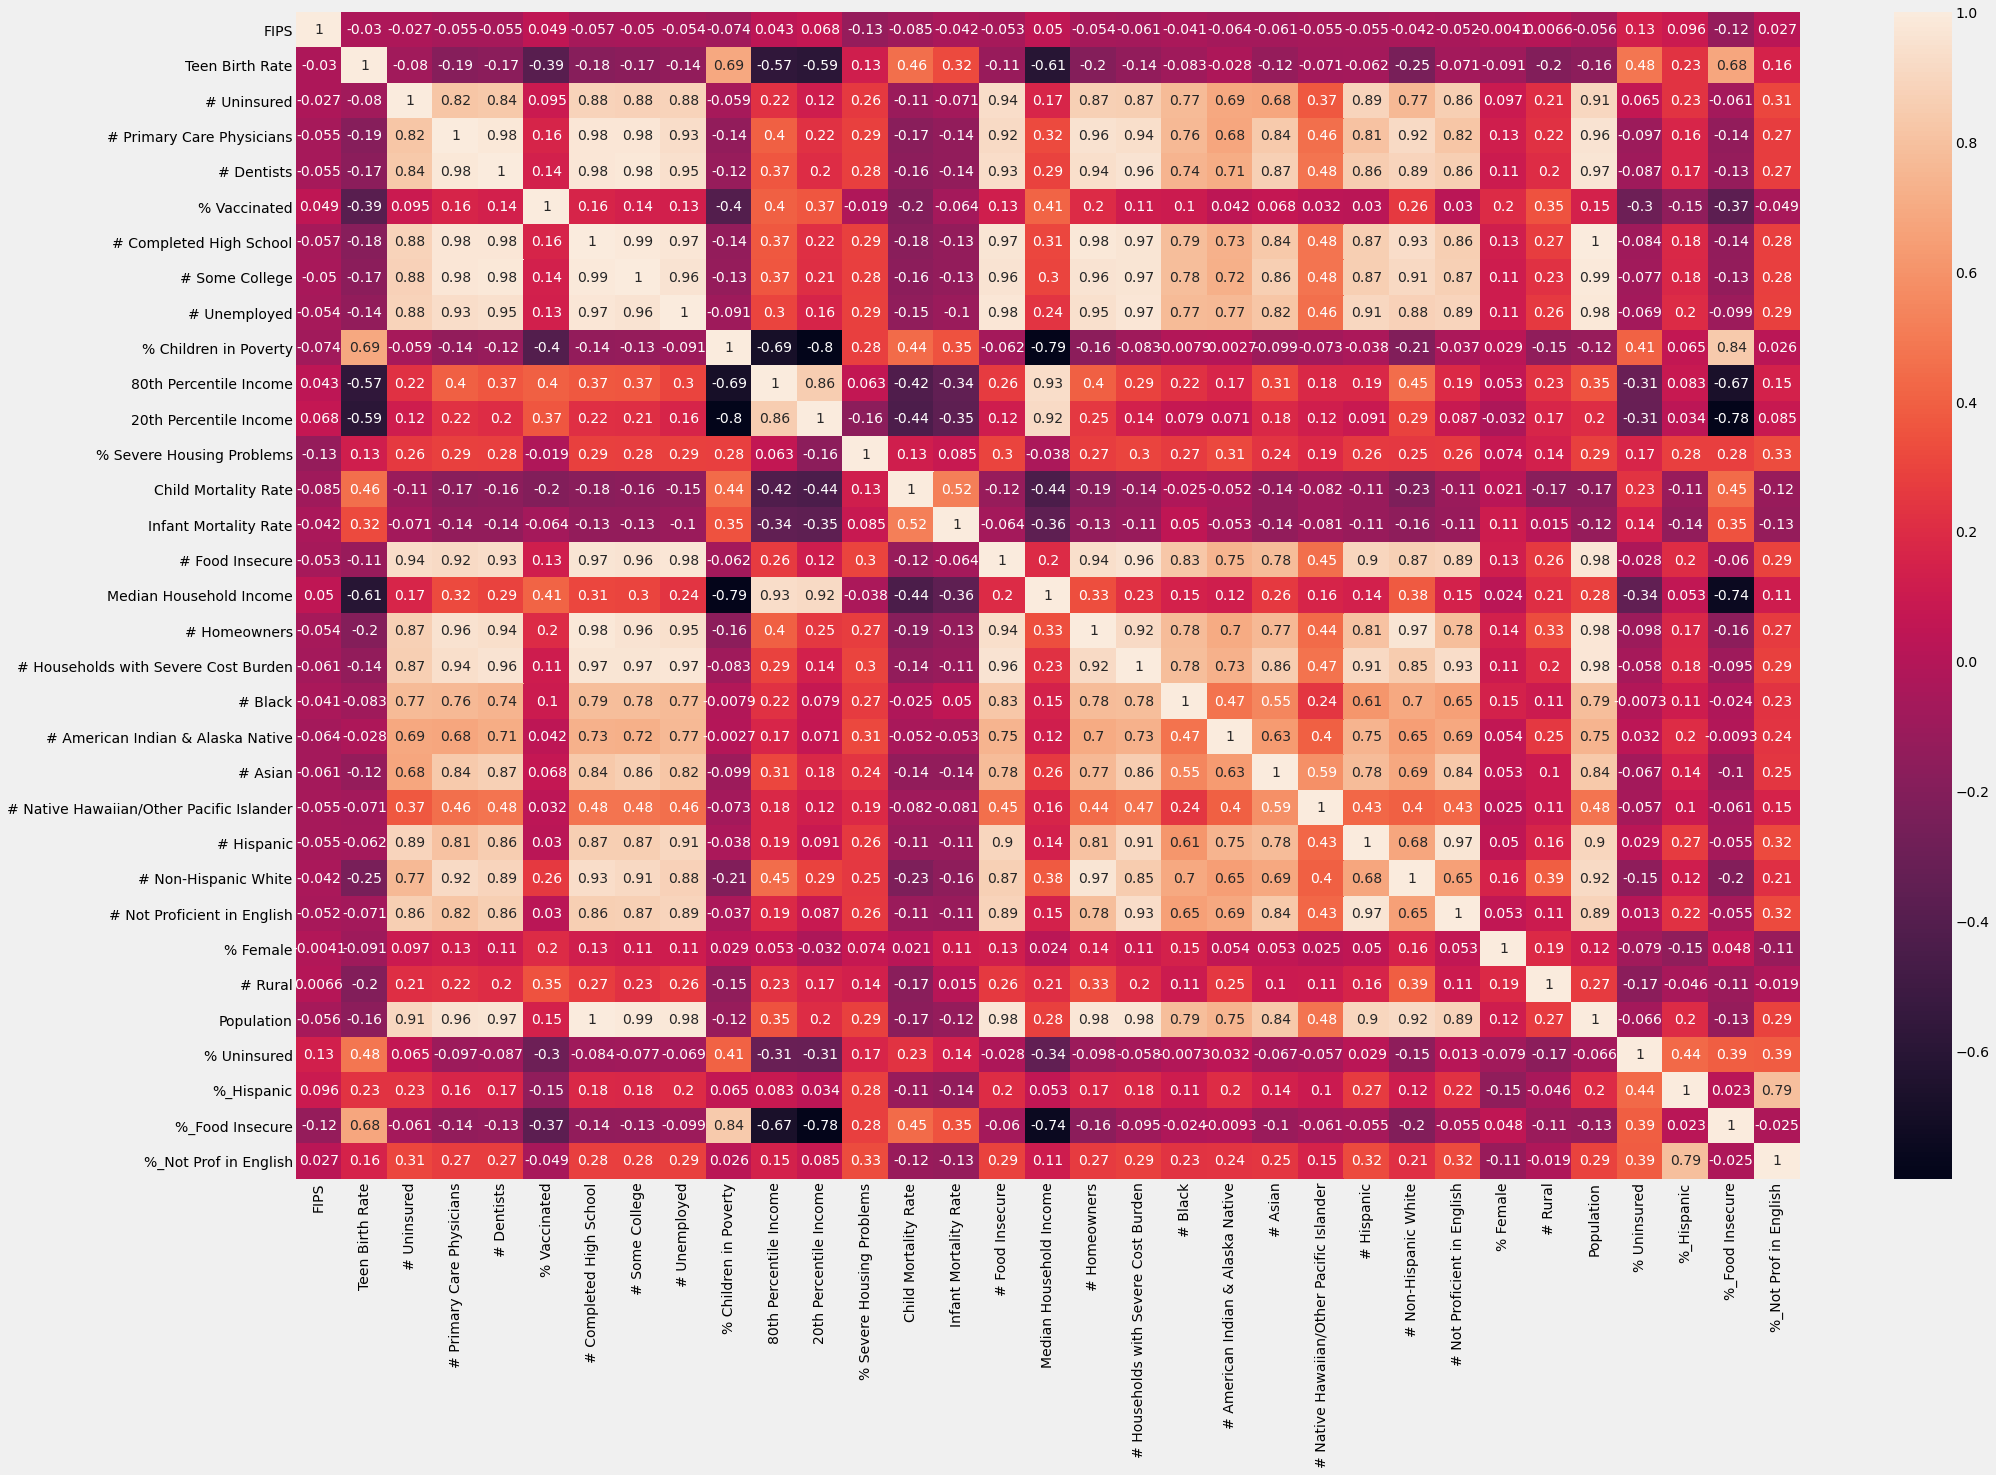

In [35]:
plt.figure(figsize= (30,20))
sns.heatmap(df.corr(), annot=True)

In [36]:
df.head()

,FIPS,State,County,Teen Birth Rate,# Uninsured,# Primary Care Physicians,# Dentists,% Vaccinated,# Completed High School,# Some College,...,# Hispanic,# Non-Hispanic White,# Not Proficient in English,% Female,# Rural,Population,% Uninsured,%_Hispanic,%_Food Insecure,%_Not Prof in English
0,1001,Alabama,Autauga,24.0,4693.0,26.0,19.0,42.0,33076,8689,...,1671,41215,419,51.5,22921.0,55869,10.0,2.990925,15.428950,0.749969
1,1003,Alabama,Baldwin,26.0,22660.0,153.0,110.0,46.0,137219,33404,...,10534,185747,1425,51.5,77060.0,223234,13.0,4.718815,12.032217,0.638344
2,1005,Alabama,Barbour,37.0,2310.0,8.0,9.0,39.0,13152,2379,...,1117,11235,454,47.1,18613.0,24686,14.0,4.524832,22.887467,1.839099
3,1007,Alabama,Bibb,38.0,1764.0,12.0,5.0,40.0,12782,2483,...,623,16663,71,46.7,15663.0,22394,11.0,2.781995,15.182638,0.317049
4,1009,Alabama,Blount,31.0,6642.0,12.0,11.0,40.0,32028,7862,...,5582,50176,878,50.8,51562.0,57826,14.0,9.653097,13.506035,1.518348


A lot of the data around number of uninsured people is driven by population as population is highly correlated with 
all the socio economic factors. However, we can run independent t-tests to conduct hypothesis testing and run a regression analysis to determine the the importance of the socio-economic factors mentioned above. 

Other interesting relationships are between teen birth rate and percent of children in poverty and teen birth rate and food insecurity. Teen birth rate does not seem to be correlated with population, so this might be an interesting pattern to explore. 

Text(0.5, 1.0, 'Relationship between Teen Birth Rate and Food Insecurity')

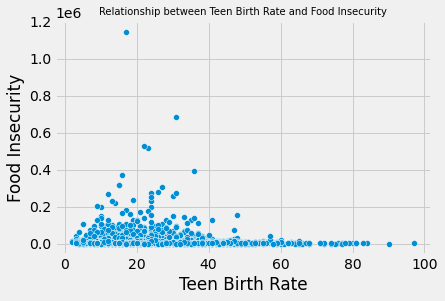

In [39]:
sns.scatterplot(x= 'Teen Birth Rate', y= '# Food Insecure', data = df)
plt.xlabel('Teen Birth Rate')
plt.ylabel('Food Insecurity')
plt.title('Relationship between Teen Birth Rate and Food Insecurity', fontsize = 10)

Text(0.5, 1.0, 'Relationship between Teen Birth Rate and Food Insecurity')

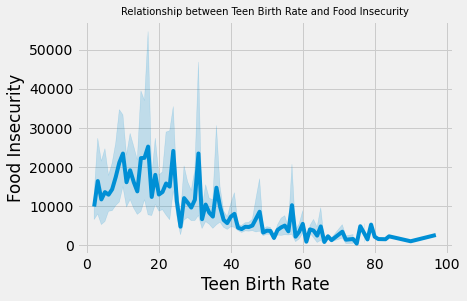

In [40]:
sns.lineplot(x= 'Teen Birth Rate', y= '# Food Insecure', data = df)
plt.xlabel('Teen Birth Rate')
plt.ylabel('Food Insecurity')
plt.title('Relationship between Teen Birth Rate and Food Insecurity', fontsize = 10)

Food Insecurity Increases upto a certain point but decreases as teen birth rate increases. 

Text(0.5, 1.0, 'Relationship between Teen Birth Rate and Children in Poverty')

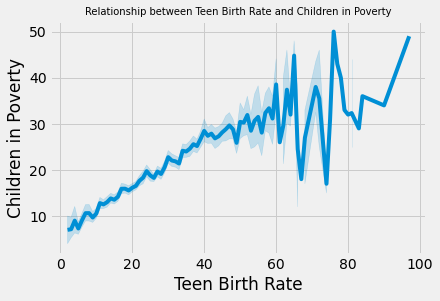

In [42]:
sns.lineplot(x= 'Teen Birth Rate', y= '% Children in Poverty', data = df)
plt.xlabel('Teen Birth Rate')
plt.ylabel('Children in Poverty')
plt.title('Relationship between Teen Birth Rate and Children in Poverty', fontsize = 10)

Teen Birth Rate is highly correlated with children in poverty. 

This data so far does not give very interesting findings related to the factors that could lead to people being uninsured. I am now going to combine another sheet from the dataset and see if there is any relation between counties' rank based on quality of life, health behavors, clinal care, social and economic factors, physical environment, length of life and number of people being uninsured. 